In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('CPU')



In [ ]:
len(gpus)

1

In [ ]:
import cv2
import imghdr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
data_dir = 'Images'

In [9]:
os.listdir(data_dir)

['ImageID_00P5ISSV.jpg',
 'ImageID_0C5UK3OG.jpg',
 'ImageID_00D9H5MH.jpg',
 'ImageID_00SCZHHW.jpg',
 'ImageID_0BWDPEGW.jpg',
 'ImageID_00VEDO1F.jpg',
 'ImageID_00GHFVPR.jpg',
 'ImageID_00HEGX6X.jpg',
 'ImageID_0BXOGB07.jpg',
 'ImageID_00AVE728.jpg',
 'ImageID_0BGG3W3J.jpg',
 'ImageID_0ADV1F31.jpg',
 'ImageID_0A4P0UP4.jpg',
 'ImageID_0ARX5HQM.jpg',
 'ImageID_0C7FSZ03.jpg',
 'ImageID_0AW4WVW4.jpg',
 'ImageID_0BAZXJ9C.jpg',
 'ImageID_00CB7YJ2.jpg',
 'ImageID_0C36MGNK.jpg',
 'ImageID_0BXC5X0Q.jpg',
 'ImageID_0AB8B2QN.jpg',
 'ImageID_0ASP0W4X.jpg',
 'ImageID_0BK795ZW.jpg',
 'ImageID_0BZQ6EY8.jpg',
 'ImageID_0A9XXFWR.jpg',
 'ImageID_0AS527FO.jpg',
 'ImageID_0B4O7FL5.jpg',
 'ImageID_00A5MDP9.jpg']

In [10]:
import pandas as pd
classification = ['Church', 'Enough/Satisfied', 'Friend', 'Love', 'Me', 'Mosque', 'Seat', 'Temple', 'You']

In [12]:
import csv
trainingSet = []
with open (r"Train (1).csv", 'r') as csvfile2:
    newLines = csv.reader(csvfile2)
    dataset = list(newLines)
    for x in range(len(dataset)):
        trainingSet.append(dataset[x])

print(trainingSet[0:10])

[['img_IDS', 'Label'], ['ImageID_33HMDMJ3', 'Temple'], ['ImageID_V5POEX4O', 'Church'], ['ImageID_89CCCCW6', 'Enough/Satisfied'], ['ImageID_GNJXOWX5', 'Me'], ['ImageID_7Q9LOP7R', 'Love'], ['ImageID_0TEORZRD', 'Love'], ['ImageID_8UNM9NYX', 'Me'], ['ImageID_98WYAZT3', 'Enough/Satisfied'], ['ImageID_P8COO08B', 'Me']]


In [13]:
class_no = []
data = []
for i in range(len(trainingSet)):
    for j in range(len(classification)):
        if trainingSet[i][1] == classification[j]:
            class_no.extend([trainingSet[i][0],j])
print(len(class_no))

12498


In [15]:
image_exts = ['jpeg','jpg','bmp','png']

In [16]:
image_exts[2]

'bmp'

In [19]:
for image in os.listdir(os.path.join(data_dir)):
  print(image)

ImageID_00P5ISSV.jpg
ImageID_0C5UK3OG.jpg
ImageID_00D9H5MH.jpg
ImageID_00SCZHHW.jpg
ImageID_0BWDPEGW.jpg
ImageID_00VEDO1F.jpg
ImageID_00GHFVPR.jpg
ImageID_00HEGX6X.jpg
ImageID_0BXOGB07.jpg
ImageID_00AVE728.jpg
ImageID_0BGG3W3J.jpg
ImageID_0ADV1F31.jpg
ImageID_0A4P0UP4.jpg
ImageID_0ARX5HQM.jpg
ImageID_0C7FSZ03.jpg
ImageID_0AW4WVW4.jpg
ImageID_0BAZXJ9C.jpg
ImageID_00CB7YJ2.jpg
ImageID_0C36MGNK.jpg
ImageID_0BXC5X0Q.jpg
ImageID_0AB8B2QN.jpg
ImageID_0ASP0W4X.jpg
ImageID_0BK795ZW.jpg
ImageID_0BZQ6EY8.jpg
ImageID_0A9XXFWR.jpg
ImageID_0AS527FO.jpg
ImageID_0B4O7FL5.jpg
ImageID_00A5MDP9.jpg


In [28]:
for image in os.listdir(os.path.join(data_dir)):
  image_path = os.path.join(data_dir,image)
  try:
    img = cv2.imread(image_path)
    tip = imghdr.what(image_path)
    if tip not in image_exts:
      print("Image not in ext list {}".format(image_path))
      os.remove(image_path)
  except Exception as e:
    print("Issue with image {}".format(image_path))


In [24]:
img = cv2.imread(os.path.join('Images','ImageID_00A5MDP9.jpg'))
type(img)
img.shape

(1280, 720, 3)

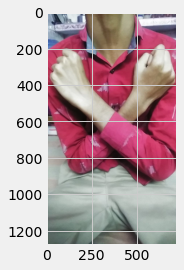

In [27]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()